In [1]:
## for data
import pandas as pd
import numpy as np
import re
from datetime import datetime
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)


In [2]:
df_movies = pd.read_csv('datasets/to_use/movies_cleaned1.csv')

In [3]:
df_movies_original = df_movies.copy()

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df_movies.head())

,movieId,title,runtime,imdb_rating,num_of_rating,budget,worldwide_gross,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,genre_nan,(Banned),13+,15,16+,18+,ADV,ADV16,AO,All,Approved,E,E10+,F,G,GA,GP,K-A,M,M/PG,M18,MA-13,MA-17,NC-16,NC-17,NC16,Open,PG,PG-13,PG13,Passed,R,R(A),R21,T,TV-13,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan
0,318,The Shawshank Redemption (1994),0.8,0.987805,1.000000,0.003876,0.009882,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,58559,The Dark Knight (2008),1.0,0.951220,1.000000,0.028681,0.344257,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,79132,Inception (2010),0.8,0.926829,0.888881,0.024805,0.286306,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2959,Fight Club (1999),0.8,0.926829,0.777763,0.009767,0.034626,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,296,Pulp Fiction (1994),1.0,0.939024,0.777763,0.001240,0.073190,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_movies.count()

movieId            22696
title              22696
runtime            22464
imdb_rating        22696
num_of_rating      22696
                   ...  
U/A                22696
Unrated            22696
X                  22696
Not Rated          22696
certificate_nan    22696
Length: 83, dtype: int64

In [6]:
obj = df_movies.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

movieId , 0
title , 0
runtime , 232
imdb_rating , 0
num_of_rating , 0
budget , 14488
worldwide_gross , 13449
Action , 0
Adult , 0
Adventure , 0
Animation , 0
Biography , 0
Comedy , 0
Crime , 0
Documentary , 0
Drama , 0
Family , 0
Fantasy , 0
Film-Noir , 0
Game-Show , 0
History , 0
Horror , 0
Music , 0
Musical , 0
Mystery , 0
News , 0
Reality-TV , 0
Romance , 0
Sci-Fi , 0
Short , 0
Sport , 0
Talk-Show , 0
Thriller , 0
War , 0
Western , 0
genre_nan , 0
(Banned) , 0
13+ , 0
15 , 0
16+ , 0
18+ , 0
ADV , 0
ADV16 , 0
AO , 0
All , 0
Approved , 0
E , 0
E10+ , 0
F , 0
G , 0
GA , 0
GP , 0
K-A , 0
M , 0
M/PG , 0
M18 , 0
MA-13 , 0
MA-17 , 0
NC-16 , 0
NC-17 , 0
NC16 , 0
Open , 0
PG , 0
PG-13 , 0
PG13 , 0
Passed , 0
R , 0
R(A) , 0
R21 , 0
T , 0
TV-13 , 0
TV-14 , 0
TV-G , 0
TV-MA , 0
TV-PG , 0
TV-Y , 0
TV-Y7 , 0
TV-Y7-FV , 0
U/A , 0
Unrated , 0
X , 0
Not Rated , 0
certificate_nan , 0


C:\Users\Kevan\AppData\Local\Temp/ipykernel_15364/2633059500.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in obj.iteritems():


In [7]:
df_ratings = pd.read_csv('datasets/to_use/ratings_cleaned.csv')

In [8]:
df_ratings['rating'].value_counts()

4.0    3623338
3.0    2571345
5.0    2060912
3.5    1716928
4.5    1244365
2.0     846076
2.5     667038
1.0     389996
1.5     208332
0.5     195839
Name: rating, dtype: int64

In [9]:
df_ratings.head(10)

,Unnamed: 0,userId,movieId,rating
0,22682008,147413,1,3.5
1,15931427,103254,1,3.0
2,785756,5320,1,5.0
3,185481,1317,1,3.0
4,4523672,29725,1,3.5
5,18774539,121730,1,3.5
6,9629051,62518,1,5.0
7,23320318,151375,1,4.0
8,3411247,22505,1,5.0
9,18774745,121734,1,5.0


In [10]:
df_ratings.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
# scale rating to 0-1 also
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_ratings[['rating']] = scaler.fit_transform(df_ratings[['rating']])

In [12]:
df_ratings

,userId,movieId,rating
0,147413,1,0.666667
1,103254,1,0.555556
2,5320,1,1.000000
3,1317,1,0.555556
4,29725,1,0.666667
...,...,...,...
13524164,39183,208941,0.555556
13524165,92412,208943,0.333333
13524166,84238,209041,0.555556
13524167,15152,209053,0.666667


# start of ANN Algo

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import layers

print(tf.__version__)
print(tf.keras.__version__)

2.11.0
2.11.0


In [14]:
#drop columns with null values and drop title also
df_movies.dropna(axis=1,inplace=True)
df_movies.drop('title', axis=1, inplace=True)

In [15]:
df_movies.count()

movieId            22696
imdb_rating        22696
num_of_rating      22696
Action             22696
Adult              22696
                   ...  
U/A                22696
Unrated            22696
X                  22696
Not Rated          22696
certificate_nan    22696
Length: 79, dtype: int64

In [16]:
df_ratings.count()

userId     13524169
movieId    13524169
rating     13524169
dtype: int64

In [17]:
df_movies = df_movies[df_movies['movieId'].isin(df_ratings['movieId'].tolist())]
df_ratings = df_ratings[df_ratings['movieId'].isin(df_movies['movieId'].tolist())]

In [18]:
df_movies.count()

movieId            21527
imdb_rating        21527
num_of_rating      21527
Action             21527
Adult              21527
                   ...  
U/A                21527
Unrated            21527
X                  21527
Not Rated          21527
certificate_nan    21527
Length: 79, dtype: int64

In [19]:
df_ratings.count()

userId     13523560
movieId    13523560
rating     13523560
dtype: int64

----------- START OF ALGO FOR USER 69 ----------------------
Epoch 1/10


C:\Users\Kevan\AppData\Local\Temp/ipykernel_15364/2436208569.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_train.sort_values(by='movieId', inplace=True)
C:\Users\Kevan\AppData\Local\Temp/ipykernel_15364/2436208569.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_test.sort_values(by='movieId', inplace=True)


3/3 [==============================] - 1s 63ms/step - loss: 0.1854 - val_loss: 0.1803
Epoch 2/10
3/3 [==============================] - 0s 10ms/step - loss: 0.1608 - val_loss: 0.1692
Epoch 3/10
3/3 [==============================] - 0s 10ms/step - loss: 0.1494 - val_loss: 0.1608
Epoch 4/10
3/3 [==============================] - 0s 10ms/step - loss: 0.1417 - val_loss: 0.1523
Epoch 5/10
3/3 [==============================] - 0s 9ms/step - loss: 0.1320 - val_loss: 0.1427
Epoch 6/10
3/3 [==============================] - 0s 9ms/step - loss: 0.1226 - val_loss: 0.1334
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.1158 - val_loss: 0.1251
Epoch 8/10
3/3 [==============================] - 0s 9ms/step - loss: 0.1038 - val_loss: 0.1176
Epoch 9/10
3/3 [==============================] - 0s 10ms/step - loss: 0.0998 - val_loss: 0.1107
Epoch 10/10
3/3 [==============================] - 0s 10ms/step - loss: 0.0909 - val_loss: 0.1046


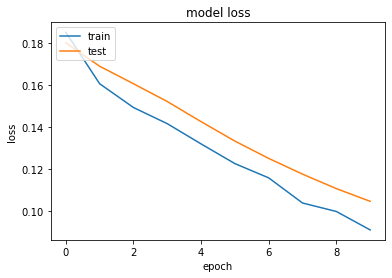

1/1 [==============================] - 0s 58ms/step
predictions  actual
[0.6669597] [1.]
[0.62334794] [0.88888889]
[0.7158754] [0.22222222]
[0.7285152] [1.]
[0.6282845] [1.]
[0.6711688] [1.]
[0.62961864] [1.]
[0.64810234] [0.11111111]
[0.68945044] [0.55555556]
[0.6779539] [0.77777778]
[0.628145] [0.]
[0.7292362] [0.77777778]
[0.6630079] [1.]
[0.66650355] [1.]
[0.7237068] [1.]
[0.6571546] [1.]
[0.6775371] [0.88888889]
[0.6864812] [0.66666667]
[0.70801216] [1.]
[0.65548] [0.55555556]
[0.6828982] [0.88888889]
1/1 [==============================] - 0s 16ms/step - loss: 0.1046
Test MSE: 0.10461357980966568
670/670 [==============================] - 0s 547us/step
       movieId  predicted_rating                                       title
0           50          0.746546                   The Usual Suspects (1995)
1       104879          0.742004                            Prisoners (2013)
2         6870          0.739336                         Mystic River (2003)
3        51540          0.

In [20]:
def get_recomm(userId):
    print('----------- START OF ALGO FOR USER', userId, '----------------------')
    
    #STEP 0: GETTING DF OF ALL MOVIES THAT HAVEN'T BEEN REVIEWED
    
    movie_id_df = df_ratings.loc[df_ratings['userId']==userId]
#     print(movie_id_df)
    
    df_movies_unreviewed = df_movies[~df_movies['movieId'].isin(movie_id_df['movieId'].tolist())]
#     print(df_movies_unreviewed)
    df_movies_unreviewed_id = df_movies_unreviewed[['movieId']]
    df_movies_unreviewed_id.reset_index(inplace=True, drop=True)
#     print(df_movies_unreviewed_id)
    df_movies_unreviewed_attributes = np.array(df_movies_unreviewed.drop('movieId', axis=1))
#     print(df_movies_unreviewed_attributes)
    
    #STEP 1: TRAIN TEST SPLIT
        
    ratings_train, ratings_test = train_test_split(movie_id_df, test_size = 0.2, random_state = 69)
    ratings_train.sort_values(by='movieId', inplace=True)
    ratings_test.sort_values(by='movieId', inplace=True)
    
#     print('----------- START OF TRAIN DATASET ----------------------')
#     print(ratings_train)
#     print('----------- END OF TRAIN DATASET ----------------------')
#     print()
#     print('----------- START OF TEST DATASET ----------------------')
#     print(ratings_test)
#     print('----------- END OF TEST DATASET ----------------------')
#     print()
    
    #STEP 2: GET TRAIN DATASETS
    
    movies_train = df_movies[df_movies['movieId'].isin(ratings_train['movieId'].tolist())]
    movies_train.sort_values(by='movieId', inplace=True)
    movies_train.set_index('movieId', inplace=True)
#     print('----------- START OF ALL TRAIN MOVIES ----------------------')
#     print(movies_train)
#     print(movies_train.shape)
#     print('----------- END OF ALL TRAIN MOVIES ----------------------')
    
#     rating_df=df_ratings.loc[df_ratings['userId']==userId][['movieId','rating']]
    ratings_train = ratings_train[['movieId','rating']]
    ratings_train.set_index('movieId', inplace=True)
#     print('----------- START OF ALL TRAIN RATINGS ----------------------')
#     print(ratings_train)
#     print(ratings_train.shape)
#     print('----------- END OF ALL TRAIN RATINGS ----------------------')
    
    #STEP 3: GET TEST DATASETS
    
    movies_test = df_movies[df_movies['movieId'].isin(ratings_test['movieId'].tolist())]
    movies_test.sort_values(by='movieId', inplace=True)
    movies_test.set_index('movieId', inplace=True)
#     print('----------- START OF ALL TEST MOVIES ----------------------')
#     print(movies_test)
#     print(movies_test.shape)
#     print('----------- END OF ALL TEST MOVIES ----------------------')
    
    ratings_test = ratings_test[['movieId','rating']]
    ratings_test.set_index('movieId', inplace=True)
#     print('----------- START OF ALL TRAIN RATINGS ----------------------')
#     print(ratings_test)
#     print(ratings_test.shape)
#     print('----------- END OF ALL TRAIN RATINGS ----------------------')
    
    #STEP 4: CONVERT TO NUMPY
    
    x_train = np.array(movies_train)
    y_train = np.array(ratings_train)
    x_test = np.array(movies_test)
    y_test = np.array(ratings_test)
    
#     Check shapes of train_images, train_labels etc
#     print('Movie size:', x_train.shape)
#     print('Rating size:', y_train.shape)
#     print(x_train)
#     print(y_train)
#     print(x_test)
#     print(y_test)
    
#     print()
#     print('----------- READY FOR NEURAL NETWORK ----------------------')
#     print()
    
    #STEP 5: ITS NN TIME
    
    
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, input_shape=(78,), activation=tf.nn.relu))      # one hidden layer
    model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
    model.add(layers.Dense(16, activation=tf.nn.relu))      # one hidden layer
    model.add(layers.Dropout(0.2))      # one hidden layer
    model.add(layers.Dense(1, activation=tf.nn.sigmoid))   # one output layer with 1 output. IS SIGMOID CORRECT?
#     print(model.output_shape)
    
    model.compile(optimizer="Adam", 
              loss='mean_squared_error',
#               metrics=['accuracy']
            )
    
    history = model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_test, y_test))
    
    plt.plot(history.history["loss"]) 
    plt.plot(history.history["val_loss"]) 
    plt.title("model loss") 
    plt.ylabel("loss") 
    plt.xlabel("epoch") 
    plt.legend(["train", "test"], loc="upper left") 
    plt.show() 
    
    predictions = model.predict(x_test)
    print('predictions', ' actual')
    [print(predictions[i], y_test[i]) for i in range(0,len(y_test))]
    
    test_loss = model.evaluate(x_test, y_test)
    print('Test MSE:', test_loss)
    
    #STEP 6: SHOW PREDICTED RATINGS OF EVERY OTHER MOVIES
    predictions = model.predict(df_movies_unreviewed_attributes)
    predictions = np.squeeze(predictions)
#     print(predictions)
#     print(predictions.shape)
    df_movies_all_predictions = df_movies_unreviewed_id.copy()
#     print(df_movies_all_predictions)
    df_movies_all_predictions['predicted_rating']=pd.Series(predictions)
#     print(pd.Series(predictions))
    df_movies_all_predictions.sort_values(by=['predicted_rating'], ascending=False, inplace=True)
#     print(df_movies_all_predictions)
    
#     df_movies_all_predictions = df_movies_all_predictions.join(df_movies_original[['movieId', 'title']], on='movieId', lsuffix='_left', rsuffix='_right')
    df_movies_all_predictions = pd.merge(df_movies_all_predictions, df_movies_original[['movieId', 'title']])
    print(df_movies_all_predictions)
        
    return test_loss

print(get_recomm(69))

# Trying with user-movie pairs as X

In [28]:
# turn df_movies into user-movie
# df_user_movie_pairs = df_ratings.join(df_movies, on='movieId', lsuffix='_left', rsuffix='_right')
df_user_movie_pairs = df_ratings.set_index('movieId').join(df_movies.set_index('movieId'))

In [29]:
df_user_movie_pairs.sort_values(by='userId', inplace=True)

In [ ]:
df_user_movie_pairs_original = df_user_movie_pairs.copy()

In [30]:
df_movie_id = pd.DataFrame()

df_movie_id['movieId'] = df_user_movie_pairs.index

df_movie_id

,movieId
0,665
1,8360
2,6711
3,6377
4,2012
...,...
13523555,6934
13523556,7147
13523557,208
13523558,416


In [27]:
#split df_user_movie_pairs first then take out the rating later. FIX BELOW FIRST

data_train, data_test = train_test_split(df_user_movie_pairs, test_size = 0.2, random_state = 69)
ratings_train.sort_values(by='movieId', inplace=True)
ratings_test.sort_values(by='movieId', inplace=True)
    
#     print('----------- START OF TRAIN DATASET ----------------------')
#     print(ratings_train)
#     print('----------- END OF TRAIN DATASET ----------------------')
#     print()
#     print('----------- START OF TEST DATASET ----------------------')
#     print(ratings_test)
#     print('----------- END OF TEST DATASET ----------------------')
#     print()

In [32]:
df_ratings = pd.DataFrame()

df_ratings['rating'] = df_user_movie_pairs['rating']

df_ratings

,rating
movieId,
665,1.000000
8360,0.777778
6711,1.000000
6377,0.777778
2012,0.444444
...,...
6934,0.333333
7147,0.888889
208,0.111111


In [35]:
df_user_movie_pairs.drop('rating', axis=1, inplace=True)

In [36]:
df_user_movie_pairs

,userId,imdb_rating,num_of_rating,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,U/A,Unrated,X,Not Rated,certificate_nan
movieId,,,,,,,,,,,,,,,,,,,,,
665,1,0.841463,0.021786,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8360,1,0.743902,0.173278,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6711,1,0.792683,0.169944,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6377,1,0.853659,0.370328,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2012,1,0.756098,0.166981,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,162541,0.670732,0.191427,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7147,162541,0.829268,0.164388,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,162541,0.609756,0.073641,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# getting overall MSE of the model

In [ ]:
num_of_users = df_ratings['userId'].nunique()
print(num_of_users)

def get_overall_mse():
#     mse_arr = np.zeros(shape=(num_of_users)) # use these 2 lines to go thru the whole dataset
#     for i in range(num_of_users):
    mse_arr = np.zeros(shape=(100))
    for i in range(100):
#         print(df_ratings[df_ratings.userId == i+1])
        current_user = i + 1
        current_mse = get_recomm(current_user)
        mse_arr[i] = current_mse
#         print(mse_arr)
#         print(np.average(mse_arr))
    return np.average(mse_arr)
        
overall_mse = get_overall_mse()
print('Overall MSE of this model:', overall_mse)

Trying with Kevan's custom ratings

In [ ]:
df_ratings = pd.read_csv('datasets/to_use/ratings_custom1.csv')

In [ ]:
scaler = MinMaxScaler()

df_ratings[['rating']] = scaler.fit_transform(df_ratings[['rating']])

In [ ]:
print(df_ratings)